# Capstone Project  - Classifying Authentic and Replica Sneakers: Book 2b

Done by: Kenny Lim, GA-DSI15

## Problem Statement

The sneaker resale market is an estimated 2 billion USD in secondary market in 2019. Estimated to be USD6 billion by 2025 according to research firm, Cowen & Co. Due to the lucrative nature of these commodities, there is the inevitable rise of counterfeits. The counterfeit sneakers sales was USD520 billion or 3.3% in global trade in 2018 and it is costing us in various ways. 

The costs to the brands include: 
1. Undercutting sales from the brands. Online counterfeit sales are responsible for approximately USD30.3 billion in annual losses to luxury brands, according to data service firm ResearchAndMarkets’ Global Brand Counterfeiting Report. 
2. Brands have to deal with the backlash from customers who have had bad experiences from fakes. Additional resources have to be allocated to deal with this
3. Reputation damage

Costs to countries:
1. US Customs and Border Protection (CBP) official stated: "However, these items often fund national and transnational criminal organizations, and cost taxpayers billions. " (Oct 2019)

Costs to collectors: 
1. We just want real sneakers man

In light of this, we want to be able to differentiate real and fake sneakers. Our task is to build a classifier that is able to differentiate between real and fake sneakers. Our primary audience will be the sneaker brands and the CBP. 

To do so, we will first be scrapping data from reddit and imgur. We will then ve using a classification model such as CNN to diffentiate between the authentic and the replicas. We will measure our success using several classification metrics including accuracy and ROCAUC. 

With this, we also hope to help buyers inform themselves and to stay away from counterfeits. Empowering the public with information, they will be able to make the right decision which could help to reduce the lucrative nature of fake sneakers. 


## Executive Summary

To combat the increasingly lucrative business of counterfeit sneakers, due to the rise of a sneaker cult following, the goal was to train a Convolutional Neural Network model to classify 2 binary outcome: Authentic or Replica sneakers.

Web scraping was performed to collect a dataset consisting of approximately 20,000 images. The [Data Scraping notebook](./book1_data_scrapping_cleaning.ipynb) can be run periodically to obtain more data over time. Eventually, we came up with a 53/47% split between authentic and replica sneakers respectively. 

As the replicas become more and more accurate to the orignals, the shade of colour and size/shape of details (logos, silhouette) on the sneakers are especially important in our case. The choice was made to maintain the RGB (coloured) and aspect ratios of the images, in the preprocessing of the images 

Our classifier was successful in predicting at an 0.84 ROCAUC score and F1 score of 0.79. We also chose the F1 score because false positive and false negatives were just as damaging to us. 

Overall, there are still areas of improvement but moving forward the first step is definitely to achieve web deployment. 

## Notebooks:
- [Data Scrapping and Cleaning](./book1_data_scrapping_cleaning.ipynb)
- [Image Selection](./book2a_img_selection.ipynb)
- [Image Preprocessing](./book2b_img_preprocessing.ipynb)
- [Modeling and Recommendations](./book3_modeling_conclusions.ipynb)

## Contents:
- [Import Libraries](#Import-Libraries)
- [Import Data](#Import-Data)
- [Image Preprocessing](#Image-Preprocessing)
- [Train Test Split](#Train-Test-Split)
- [Save Image Array Data to npy](#Save-Image-Array-Data-to-npy)

## Import Libraries

In [1]:
import numpy as np

#for reproducibility
np.random.seed(15)

#image preprocessing
import os
from PIL import Image
import random

#plotting
import matplotlib.pyplot as plt
#import matplotlib.image as img

#split dataset
from sklearn.model_selection import train_test_split

## Import Data

By getting images from the directory itself, we elimiate corrupt images and single channel images that were sieved out earlier

In [2]:
#full dataset
auth_dir = '/Users/kenny/Dropbox/GA/capstone_assets/images/det/auth_det'
rep_dir = '/Users/kenny/Dropbox/GA/capstone_assets/images/det/rep_det'

#we dont want to include files such as .DS_Store
auth = [i for i in os.listdir(auth_dir) if not i.startswith('.')]
rep = [i for i in os.listdir(rep_dir) if not i.startswith('.')]

In [3]:
#check the number of images we have
print(f'Authentic Images: {len(auth)}')
print(f'Replica Images: {len(rep)}')

#merge lists and check length
img_lst = auth + rep
print(f'Total Images: {len(img_lst)}')

Authentic Images: 8335
Replica Images: 5347
Total Images: 13682


## Image Preprocessing

#### Convert to 3 channel, resize and pad

In [9]:
#function to resize images
def resize_img(name, is_rep, resize_config = 150):
    temp_path = f"/Users/kenny/Dropbox/GA/capstone_assets/images/det/{is_rep}_det/{name}"   #change to file path where your images are stored
    im = Image.open(temp_path)                                      #open image
    
    #calculate aspect ratio
    org_size = im.size                                              #get current image size
    ratio = float(resize_config)/max(org_size)                      #calculate aspect ratio
    new_size = tuple([int(x * ratio) for x in org_size])            #calculate new size

    new_im = im.convert(mode='RGB')                                 #ensure all images are RGB
    new_im = new_im.resize(new_size, Image.LANCZOS)                 #resize to new size

    canvas = Image.new("RGB", (resize_config, resize_config))       #create empty image to paste on
    canvas.paste(new_im, ((resize_config-new_size[0])//2,           #padding
                         (resize_config-new_size[1])//2))
    
    #return img as array
    return np.array(canvas)                                         #convert to np array

In [10]:
%%time

img_array = []

for i in range(len(img_lst)):
    
    #first half of images are authentic
    if i < len(auth) :
        is_rep = 'auth'
    #second half are replicas
    else:
        is_rep = 'rep'
    
    #append as a list 
    #so that we can shuffle later without affecting labels
    img_array.append([resize_img(img_lst[i], is_rep),is_rep])
    
    #print to show progress
    if i%100==0:
        print(f"resizing image {i+1} of {len(img_lst)}...")

resizing image 1 of 13682...
resizing image 101 of 13682...
resizing image 201 of 13682...
resizing image 301 of 13682...
resizing image 401 of 13682...
resizing image 501 of 13682...
resizing image 601 of 13682...
resizing image 701 of 13682...
resizing image 801 of 13682...
resizing image 901 of 13682...
resizing image 1001 of 13682...
resizing image 1101 of 13682...
resizing image 1201 of 13682...
resizing image 1301 of 13682...
resizing image 1401 of 13682...
resizing image 1501 of 13682...
resizing image 1601 of 13682...
resizing image 1701 of 13682...
resizing image 1801 of 13682...
resizing image 1901 of 13682...
resizing image 2001 of 13682...
resizing image 2101 of 13682...
resizing image 2201 of 13682...
resizing image 2301 of 13682...
resizing image 2401 of 13682...
resizing image 2501 of 13682...
resizing image 2601 of 13682...
resizing image 2701 of 13682...
resizing image 2801 of 13682...
resizing image 2901 of 13682...
resizing image 3001 of 13682...
resizing image 3101 

In [11]:
#shuffle data
random.shuffle(img_array)

X = []
y = []

#unpack each list and append into appropriate lists
for features, label in img_array:
    X.append(features)
    y.append(label)


#credit: https://towardsdatascience.com/all-the-steps-to-build-your-first-image-classifier-with-code-cf244b015799

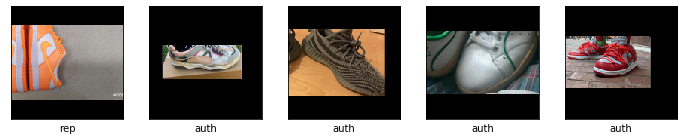

In [12]:
#let's take a look at our resized images
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(y[i])

In [13]:
#check our labels
y[:5]

['rep', 'auth', 'auth', 'auth', 'auth']

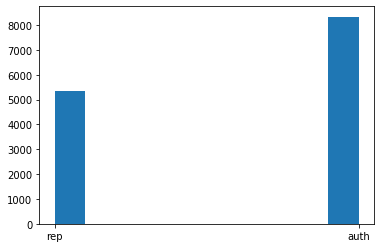

In [15]:
plt.hist(y);

In [16]:
#convert y to dummy
y = [1 if label == 'rep' else 0 for label in y ]

In [17]:
#check with above 
y[:5]

[1, 0, 0, 0, 0]

In [18]:
#convert list to np array
X = np.array(X)
y = np.array(y)

#make sure data are all float to prevent any errors when we feed it into machine
X = X.astype('float32')

#scale the data
X /= 255

In [19]:
#see final shape of arrays
print(X.shape)
print(y.shape)

(13682, 150, 150, 3)
(13682,)


## Train Test Split

In [20]:
# we are doing an 90/10 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state = 42)

print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)

print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (12313, 150, 150, 3)
Shape of y_train:  (12313,)
Shape of X_test:  (1369, 150, 150, 3)
Shape of y_test:  (1369,)


## Save Image Array Data to npy

In [21]:
#save X
np.save('../datasets/npy/X_train.npy', X_train)
np.save('../datasets/npy/X_test.npy', X_test)

#save y
np.save('../datasets/npy/y_train.npy',y_train)
np.save('../datasets/npy/y_test.npy',y_test)